# 5700 Homework

Due: Wednesday May 4, 2022, 11:59pm

Late deadline (50\% off): Friday May 6, 2022, 11:59pm

Name: Dani Song

NetID: ds2288


## Instructions
Read through this python notebook. You will be asked questions and given programming tasks. These are numbered, followed by point values for grading (for example, "Question 17.8 (5pt)"). You should edit the notebook directly to input your solution code and question answers. You can double click on text to edit it, which you should use for putting your question answers in the notebook.

**VERY IMPORTANT!** Your submission *needs* to contain the output results of running your notebook. We cannot guarantee that we will run your notebook if you do not provide the outputs, because running this notebook can take a while. It is possible that you will receive **zero points** if you do not provide the outputs of running the notebook. You can avoid this by carefully following the following submission instructions, and making sure that what you submit contains the outputs of your code.

When you are ready to submit, you should run all of your code (click Cell->Run All). Then you should submit **three** files to gradescope:
* PDF: export to PDF (click File->Download as->PDF via LaTeX)
* .py: export to Python (click File->Download as->Python (.py))
* .ipynb: submit the edited Jupyter Notebook


# MDP Base Class
You will implement an MDP base class. The introduction of the class is in the comments below.

## Task 1.1: Implement the ``sim_transition`` function (2 pts)

In [200]:
import os, time, random, copy
import numpy as np
import matplotlib.pyplot as plt
import pickle

# random sample from a (state -> probability) dict
def sample(d):
    states = [x[0] for x in d.items()]
    probs  = [x[1] for x in d.items()]
    return states[np.random.choice(len(states), p=probs)]


class MDP:
    # Contains the following attributes:
    # states: container for all the possible states, e.g., a list or a set
    # actions: container for all the possible actions, e.g., a list or a set
    # discount_factor: a real number, greater than 0, less than or equal to 1
    # init_state: a distribution over all the states
    # Contains 4 member functions:
    # reward_fn: (state, action, state) -> r(state, action, state)
    # terminal: state -> bool to check whether current MDP is stopped
    # transition_model: (state, action) -> probability distribution over next state
    # sim_transition: (state, action) -> (r(state, action), next_state) 
    #                 since many reward function has nothing to do with next state
    #                 or 
    #                 (state, action, next_state) -> (r(state, action), next_state)
    #                 Note, if state is a terminal state, please sample from the intial states

    def __init__(self, states, actions, discount_factor, init_state):
        self.states = states
        self.actions = actions
        self.discount_factor = discount_factor
        self.init_state = init_state

    def terminal(self, s):
        assert False, "implement for a specific MDP in the child class"

    def reward_fn(self, s, a, sp):
        assert False, "implement for a specific MDP in the child class"

    def transition_model(self, s, a):
        assert False, "implement for a specific MDP in the child class"
    
    # You can use anything from this class to implement this.
    def sim_transition(self, s, a, sp=None):
        # TODO: ASSIGNMENT
        if (self.terminal(s)):
            sp = sample(self.init_states)
        else:
            if (sp == None):
                sp = sample(self.transition_model(s, a))
        return (self.reward_fn(s, a, sp), sp)

# A simple MDP instance and Policy Evaluation

This part is to help you be comfortable with working with a class inherited from the MDP base class

## Task 1.2 (5 pts)

You will be implmenting a simple infinite MDP class that consists of:
1. Four states: 0, 1, 2, 3
2. Two actions: 0, 1

More intructions can be found in the comments below.

In [201]:
class example_MDP(MDP):
    # Inherited from the MDP class
    # the reward function is given by a dict: (s, a, s^\prime) -> r
    # the discount factor is also given as an argument, note here it is  infinite MDP, so its range is [0, 1)
    # the initial state is always 0
    # the state transition function p is also given by a dict: (s, a) -> a probability distribution over all the states
    def __init__(self, reward_function, state_transition_function, discount_factor):
        #TODO: Assignment
        self.states = [0, 1, 2, 3]
        self.actions = [0, 1]
        assert (discount_factor >= 0 and discount_factor < 1)
        self.discount_factor = discount_factor
        self.init_state = {0: 1.0, 1: 0.0, 2: 0.0, 3: 0.0}
        self.reward_function = reward_function
        self.state_transition_function = state_transition_function

    def terminal(self, s):
        #TODO: Assignment
        return False 
        # MDP is infinite (no terminal state)

    def reward_fn(self, s, a, sp):
        #TODO: Assignment
        return self.reward_function[s, a, sp]

    def transition_model(self, s, a):
        #TODO: Assignment
        return self.state_transition_function[s, a]

Now, we create a real MDP as shown in the figure below (please run the next cell to get the figure) to test your code above.

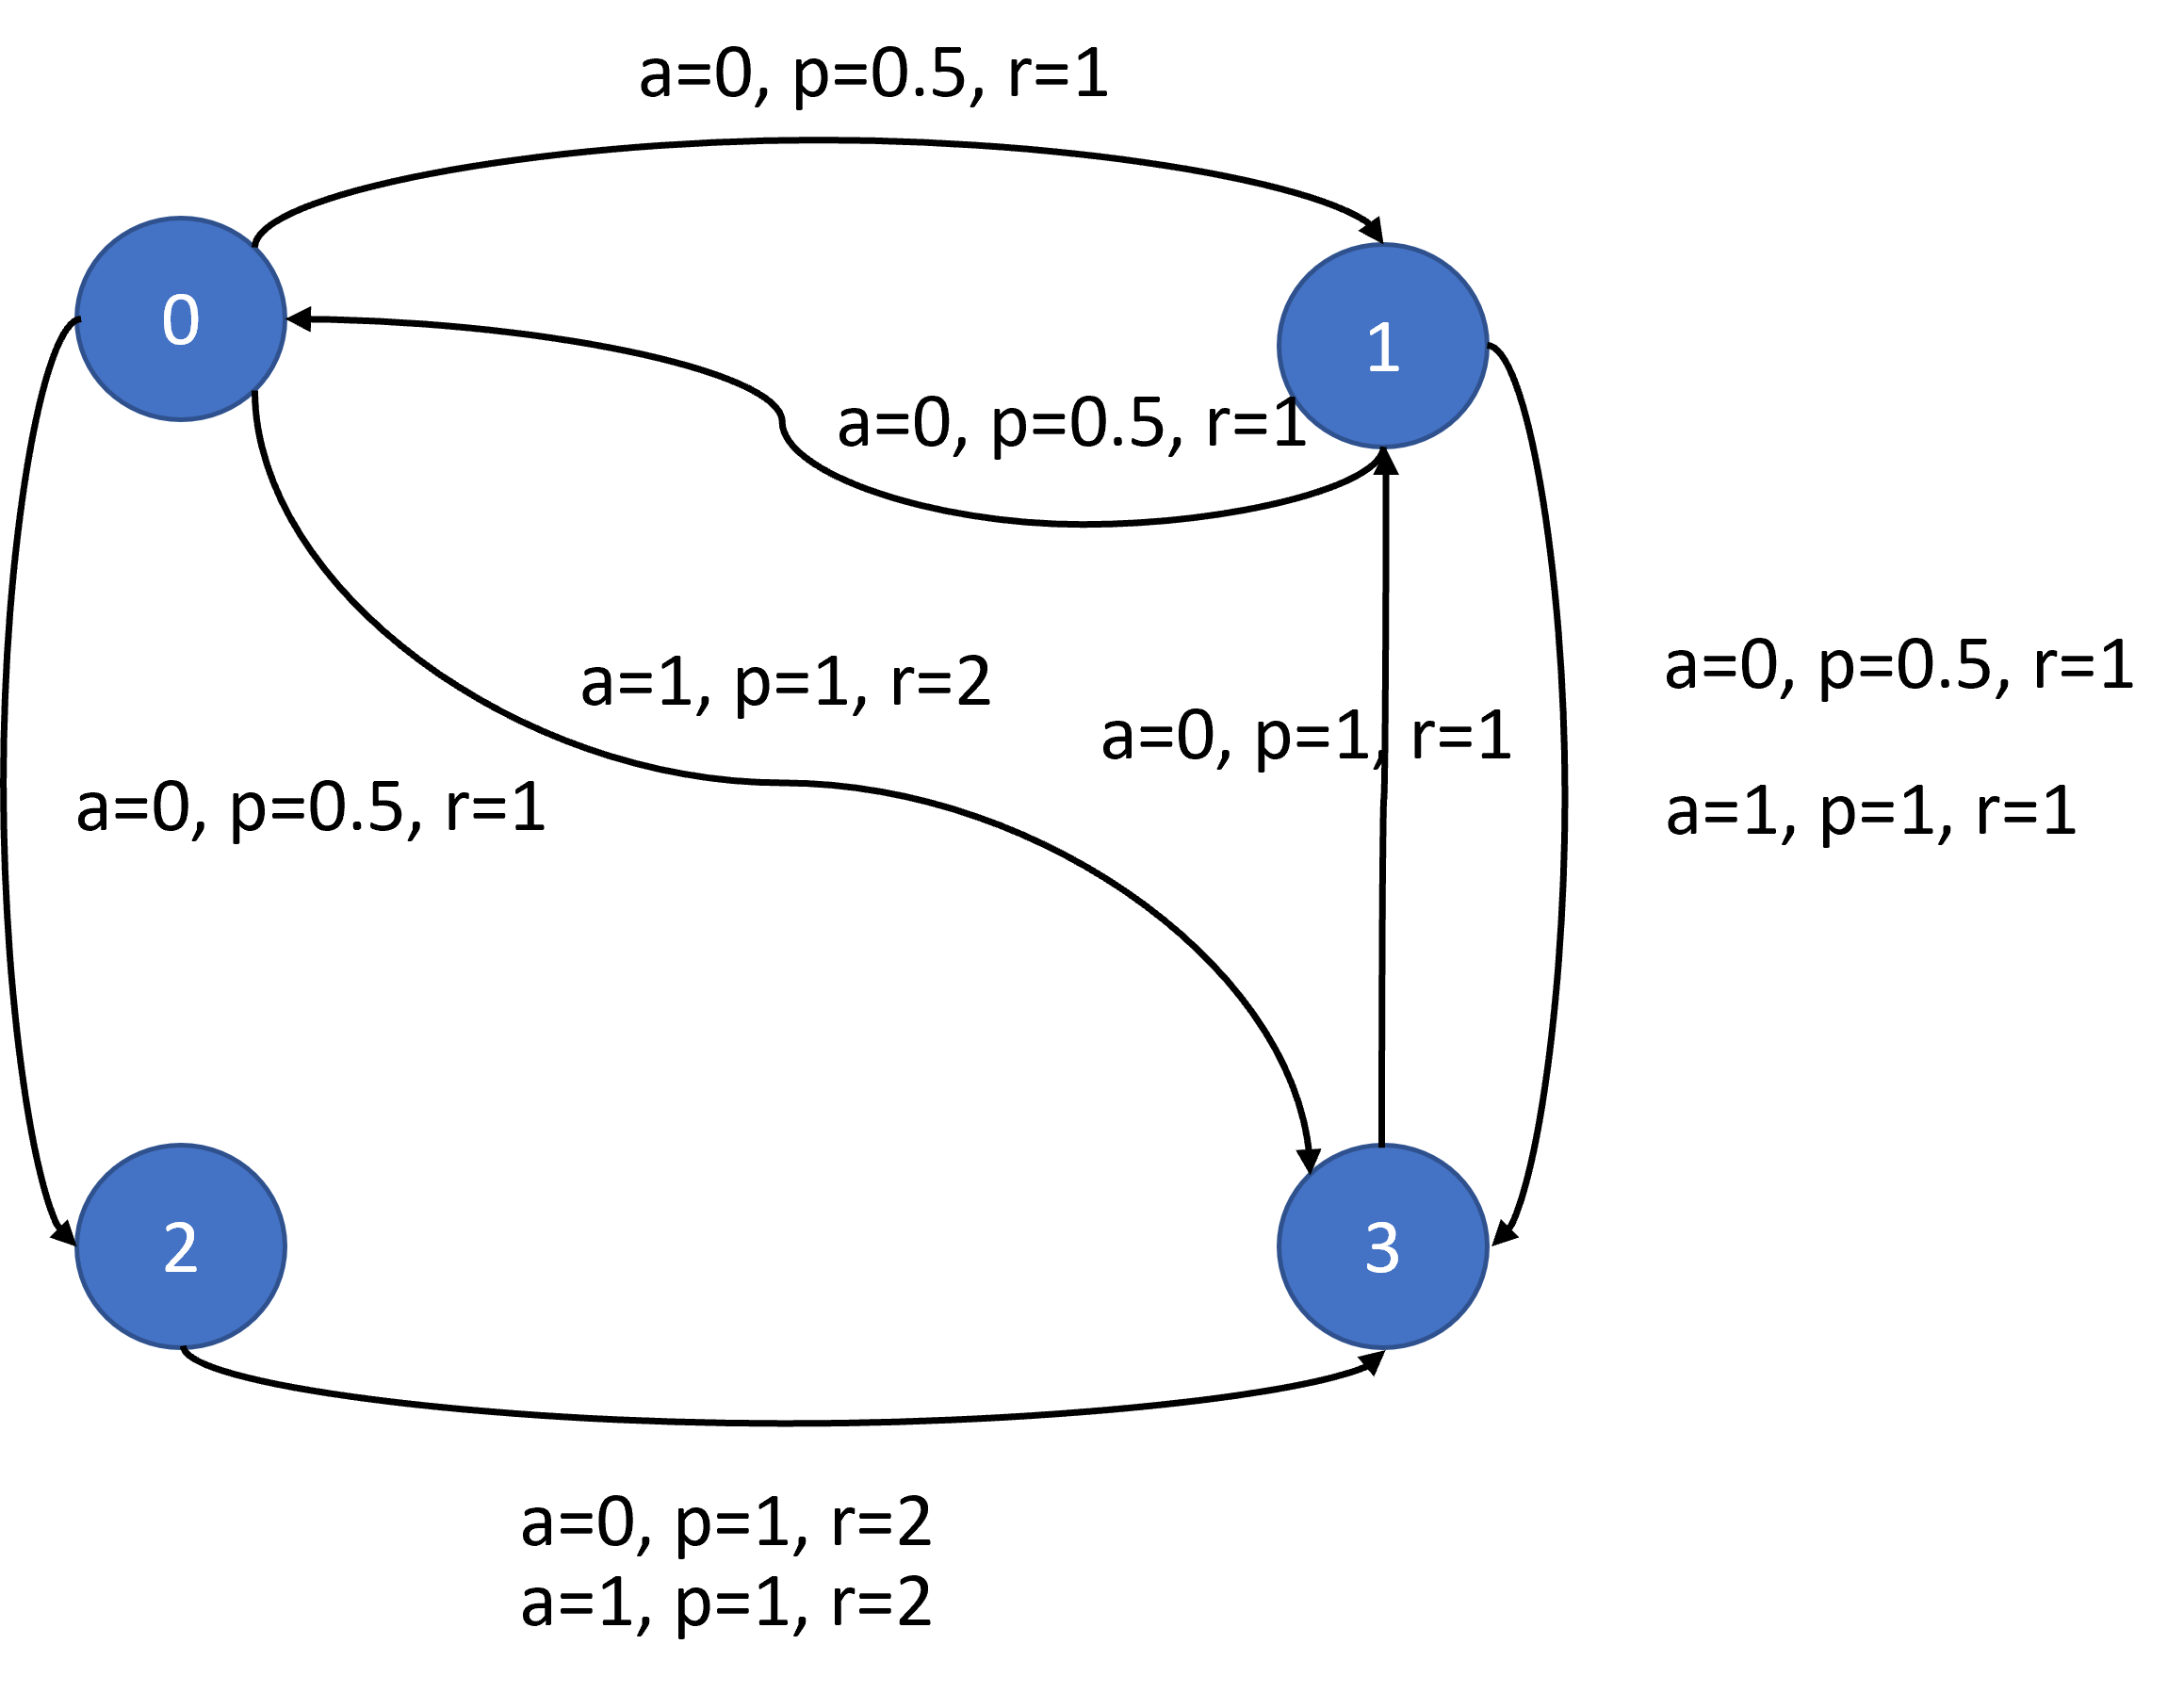

In [202]:
from IPython import display
display.Image("./fix_simple_mdp.png")

We only plot the arrows where their transition probabilities are greater than 0.

## Task 2.1 (2 pts)
Based on the figure above, create variables `reward_function` and `state_transition_function`, which should be compatible with being passed as arguments to the constructor of `example_MDP`.

In [242]:
# TODO: Assignment
reward_function = {} # fill this in as part of the assignment
# reward for state 0
reward_function[0, 0, 0] = 0.0
reward_function[0, 0, 1] = 1.0
reward_function[0, 0, 2] = 1.0
reward_function[0, 0, 3] = 0.0
reward_function[0, 1, 0] = 0.0
reward_function[0, 1, 1] = 0.0
reward_function[0, 1, 2] = 0.0
reward_function[0, 1, 3] = 2.0
# reward for state 1
reward_function[1, 0, 0] = 1.0
reward_function[1, 0, 1] = 0.0
reward_function[1, 0, 2] = 0.0
reward_function[1, 0, 3] = 1.0
reward_function[1, 1, 0] = 0.0
reward_function[1, 1, 1] = 0.0
reward_function[1, 1, 2] = 0.0
reward_function[1, 1, 3] = 1.0
# reward for state 2
reward_function[2, 0, 0] = 0.0
reward_function[2, 0, 1] = 0.0
reward_function[2, 0, 2] = 0.0
reward_function[2, 0, 3] = 2.0
reward_function[2, 1, 0] = 0.0
reward_function[2, 1, 1] = 0.0
reward_function[2, 1, 2] = 0.0
reward_function[2, 1, 3] = 2.0
#reward for state 3
reward_function[3, 0, 0] = 0.0
reward_function[3, 0, 1] = 1.0
reward_function[3, 0, 2] = 0.0
reward_function[3, 0, 3] = 0.0
reward_function[3, 1, 0] = 0.0
reward_function[3, 1, 1] = 0.0
reward_function[3, 1, 2] = 0.0
reward_function[3, 1, 3] = 0.0

state_transition_function = {} # fill this in as part of the assignment
state_transition_function[0, 0] = {0: 0.0, 1: 0.5, 2: 0.5, 3: 0.0}
state_transition_function[0, 1] = {0: 0.0, 1: 0.0, 2: 0.0, 3: 1.0}
state_transition_function[1, 0] = {0: 0.5, 1: 0.0, 2: 0.0, 3: 0.5}
state_transition_function[1, 1] = {0: 0.0, 1: 0.0, 2: 0.0, 3: 1.0}
state_transition_function[2, 0] = {0: 0.0, 1: 0.0, 2: 0.0, 3: 1.0}
state_transition_function[2, 1] = {0: 0.0, 1: 0.0, 2: 0.0, 3: 1.0}
state_transition_function[3, 0] = {0: 0.0, 1: 1.0, 2: 0.0, 3: 0.0}
state_transition_function[3, 1] = {0: 0.0, 1: 0.0, 2: 0.0, 3: 1.0}

## Task 2.2 Evaulate a policy given full knowledge of the MDP. (10 pts)
We know S, A, $p(s^\prime|s, a)$ and $R(s, a, s^\prime)$, so you will implement a **policy_evaluation_exact** function that can evaulate a deterministic policy for this MDP. 

As metioned in the slides, you can use Gaussian Elimination to solve the equation system. However, we do not require you to implement the Gaussian Elimination by yourself, you can use **np.linalg.solve** or any method you are comfortable with.

More instructions are in the comments below.

In [243]:
def policy_evaluation_exact(pi, mdp):
    # Given an MDP class, evaulate the deterministic policy pi.
    # Note, pi is a dict: s -> a.
    # The return is expected to be a dict: s->the expected culmulitive reward w.r.t. pi of state s
    # TODO: Assignment
    a = [0] * len(pi)
    b = [0] * len(pi)
    
    for s in pi:
        aa = [0] * len(pi)
        aa[s] += -1
        stm = mdp.transition_model(s, pi[s]) # dictionary of states and distribution
        for sp in stm:
            b[s] += -stm[sp]*mdp.reward_fn(s, pi[s], sp)
            aa[sp] += stm[sp]*mdp.discount_factor
        a[s] = aa
        
    a = np.array(a)
    b = np.array(b)
    x = np.linalg.solve(a, b)
    dict = {}
    for i in range(len(pi)):
        dict[i] = x[i]
    return dict

Now we create an instance of example_MDP and a policy pi below. Then we can test your policy_evaluation_exact code. The discount_factor is 0.5.

In [244]:
example_mdp = example_MDP(reward_function, state_transition_function, discount_factor=0.5)
pi = {}
pi[0] = 0
pi[1] = 0
pi[2] = 1
pi[3] = 0
st_time = time.time()
V = policy_evaluation_exact(pi, example_mdp)
print ("policy evaluation exact time cost: ", time.time() - st_time)
answer_V = {0: 2.2745098039215685, 1: 2.0784313725490198, 2: 3.019607843137255, 3: 2.0392156862745097}
error_eps = 1e-6
flag = 0
for k, v in V.items():
    if np.abs(v - answer_V[k]) > error_eps:
        flag = 1
        raise ValueError("Wrong expected cumulative reward at state %d" % (k))
if not flag:
    print ("You have passed the example test!")

policy evaluation exact time cost:  0.00025200843811035156
You have passed the example test!


## Task 2.3 Iterative Policy Evaluation (10 pts)
In addition to solving the value function exactly as we did above, we can also solve it iteratively. Iterative policy evaluation is more efficient in general.

The basic idea of iterative policy evaluation is to keep updating the value function as following:
$$V(s) = \sum_{s^\prime \in S}p(s^\prime|s, \pi(s))(R(s, \pi(s), s^\prime) + \gamma V(s^\prime))$$
until the difference between the old value of $V(s)$ and the new value of $V(s)$ is small enough (use 1e-6 in this assignment), i.e., converge to the true value.

You will be implmenting the **policy_evaluation_iterative** function. Please print the number of iteration used until convergence in the function.

In [245]:
def policy_evaluation_iterative(pi, mdp, init_V=None):
    # Given an MDP class, evaulate the deterministic policy pi.
    # Note, pi is a dict: s -> a.
    # init_V is the estimated value for each state, if it is None, set 0 for all states
    # The return is expected to be a dict: s->the expected culmulitive reward w.r.t. pi of state s
    # TODO: Assignment
    if (init_V == None):
        V = [0.0] * len(pi)
        prev = [0.0] * len(pi)
    else:
        V = init_V
        prev = [0.0] * len(pi)
    
    for i in range(len(prev)):
        prev[i] += 1
        
    num_iter = 0
        
    while (error(V, prev)):
        for s in pi:
            prev[s] = V[s]
            V[s] = 0.0
            stm = mdp.transition_model(s, pi[s])
            for sp in stm:
                V[s] += stm[sp]*(mdp.reward_fn(s, pi[s], sp) + mdp.discount_factor*V[sp])
        num_iter += 1
        
#     print("number of iterations: ", num_iter)
    
    dict = {}
    for i in range(len(V)):
        dict[i] = V[i]
    return dict

def error(first, second):
    for i in range(len(first)):
        if (abs(first[i] - second[i]) > 1e-6):
            return True
    return False

In [246]:
example_mdp = example_MDP(reward_function, state_transition_function, discount_factor=0.5)
pi = {}
pi[0] = 0
pi[1] = 0
pi[2] = 1
pi[3] = 0
st_time = time.time()
V = policy_evaluation_iterative(pi, example_mdp)
print ("policy evaluaiton iterative time cost: ", time.time() - st_time)
answer_V = {0: 2.2745098039215685, 1: 2.0784313725490198, 2: 3.019607843137255, 3: 2.0392156862745097}
error_eps = 1e-6
flag = 0
for k, v in V.items():
    if np.abs(v - answer_V[k]) > error_eps:
        flag = 1
        raise ValueError("Wrong expected cumulative reward at state %d" % (k))
if not flag:
    print ("You have passed the example test!")

policy evaluaiton iterative time cost:  0.00020384788513183594
You have passed the example test!


Another important thing in iterative policy evaluation is the intial value, which impacts the efficiency of the algorithm. Try doing both a good guess and a bad guess of the value function below and see how the number of iteration varies.

In [247]:
#TODO: Assignment
good_init_V = [2.2745098039215685, 2.0784313725490198, 3.019607843137255, 2.039215686274509]
bad_init_V = [1000000000, 1000000000, 1000000000, 1000000000]
print ("Good init V")
V = policy_evaluation_iterative(pi, example_mdp, init_V=good_init_V)
print ("All zero init V")
V = policy_evaluation_iterative(pi, example_mdp, init_V=None)
print ("Bad init V")
V = policy_evaluation_iterative(pi, example_mdp, init_V=bad_init_V)

Good init V
All zero init V
Bad init V


# Find the Optimal Policy (5 pts)
We have implmented two types of policy evaluation above. Now we want to find the optimal policy if we know S, A, $p(s^\prime|s, a)$ and $R(s, a, s^\prime$).
You will be implementing the policy iteration algorithm step by step:
1. Policy Evaluation (we have done in the Task 2)
2. Policy Improvement
3. Combine them toghther

## Task 3.1 Policy Improvment
Given a value function $V$ and an MDP instance, you want to find the best policy w.r.t. $V$. You will be implementing the **policy_improvment** function. 

In [256]:
def policy_improvement(V, mdp):
    # Given an MDP class and value function V, return the optimal deterministic policy pi.
    # Note, pi is a dict: s -> a.
    # The return is expected to be a dict: s->a
    # TODO: Assignment
    pi = {}
    
    for s in V:
        A = [0] * len(mdp.actions)
        for a in range(len(A)):
            stm = mdp.transition_model(s, a)
            print(a)
            for sp in stm:
                A[a] += stm[sp]*(mdp.reward_fn(s, a, sp) + mdp.discount_factor*V[sp])
            print(A[a])
        print(A)
        pi[s] = A.index(max(A))
    
    return pi

## Task 3.2 Policy Iteration (5 pts)
You can implement the **policy_iteration** now. We consider three types of the policy evaluation step:
1. one_step: as described in the slides, we only do one step of the Bellman equation.
2. exact: solve the linear system exactly
3. iterative: iteratively solve the linear system

In [257]:
def policy_iteration(mdp, mode="one_step"):
    # Given an mdp, you need to find the optimal policy pi: s->a
    # Note pi is a dict: s->a and it is supposed to be the return
    # TODO: Assignment
    pi = {}
    V = [0] * len(mdp.states)
    prev = {}
    
    for s in mdp.states:
        pi[s] = 0
        prev[s] = 1
    
    num_iter = 0
    
    print("pi: ", pi)
        
    while (policies(pi, prev)):
        if (mode=="exact"):
            prev = pi
            V = policy_evaluation_exact(pi, mdp)
            pi = policy_improvement(V, mdp)
        elif (mode=="iterative"):
            prev = pi
            V = policy_evaluation_iterative(pi, mdp, V)
            pi = policy_improvement(V, mdp)
        else: # one step, iterative for now
            print("number of iteration: ", num_iter)
            prev = pi
            V = policy_evaluation_iterative(pi, mdp, V)
            pi = policy_improvement(V, mdp)
            print("V: ", V)
            print("pi: ", pi)
        num_iter += 1
            
    return pi

def policies(first, second):
    for i in first:
        if (first[i] != second[i]):
            return True
    return False

Now we use the previous defined example_MDP class to test your policy iteration.

In [258]:
modes = ["one_step", "exact", "iterative"]
for mode in modes:
    optimal_pi = policy_iteration(example_mdp, mode=mode)
    V = policy_evaluation_iterative(optimal_pi, example_mdp)
    error_eps = 1e-6
    flag = 0
    print ("Now testing the policy iteration mode: %s" % (mode))
    for k, v in V.items():
        if np.abs(v - answer_V[k]) > error_eps:
            flag = 1
            raise ValueError("Wrong expected cumulative reward at state %d" % (k))
    if not flag:
        print ("You have passed the example test!")

pi:  {0: 0, 1: 0, 2: 0, 3: 0}
number of iteration:  0
0
2.274509778092889
1
3.019607830222915
[2.274509778092889, 3.019607830222915]
0
2.0784313402631707
1
2.019607830222915
[2.0784313402631707, 2.019607830222915]
0
3.019607830222915
1
3.019607830222915
[3.019607830222915, 3.019607830222915]
0
2.0392156604458305
1
1.0196078302229152
[2.0392156604458305, 1.0196078302229152]
V:  {0: 2.2745097006068526, 1: 2.078431320891661, 2: 3.0196077914798956, 3: 2.0392156604458305}
pi:  {0: 1, 1: 0, 2: 0, 3: 0}
number of iteration:  1
0
2.3461538078485873
1
3.0769230605065374
[2.3461538078485873, 3.0769230605065374]
0
2.3076922775953186
1
2.0769230605065374
[2.3076922775953186, 2.0769230605065374]
0
3.0769230605065374
1
3.0769230605065374
[3.0769230605065374, 3.0769230605065374]
0
2.153846121013075
1
1.0769230605065374
[2.153846121013075, 1.0769230605065374]
V:  {0: 3.0769229893682, 1: 2.3076922420261496, 2: 3.0769229893682, 3: 2.153846121013075}
pi:  {0: 1, 1: 0, 2: 0, 3: 0}
Now testing the policy i

ValueError: Wrong expected cumulative reward at state 0

# Learn to play a real-game *No_Exit*
After solving a simple MDP instance, we now are trying to learn to play a game called *No_Exit*. There is a figure about this game below.


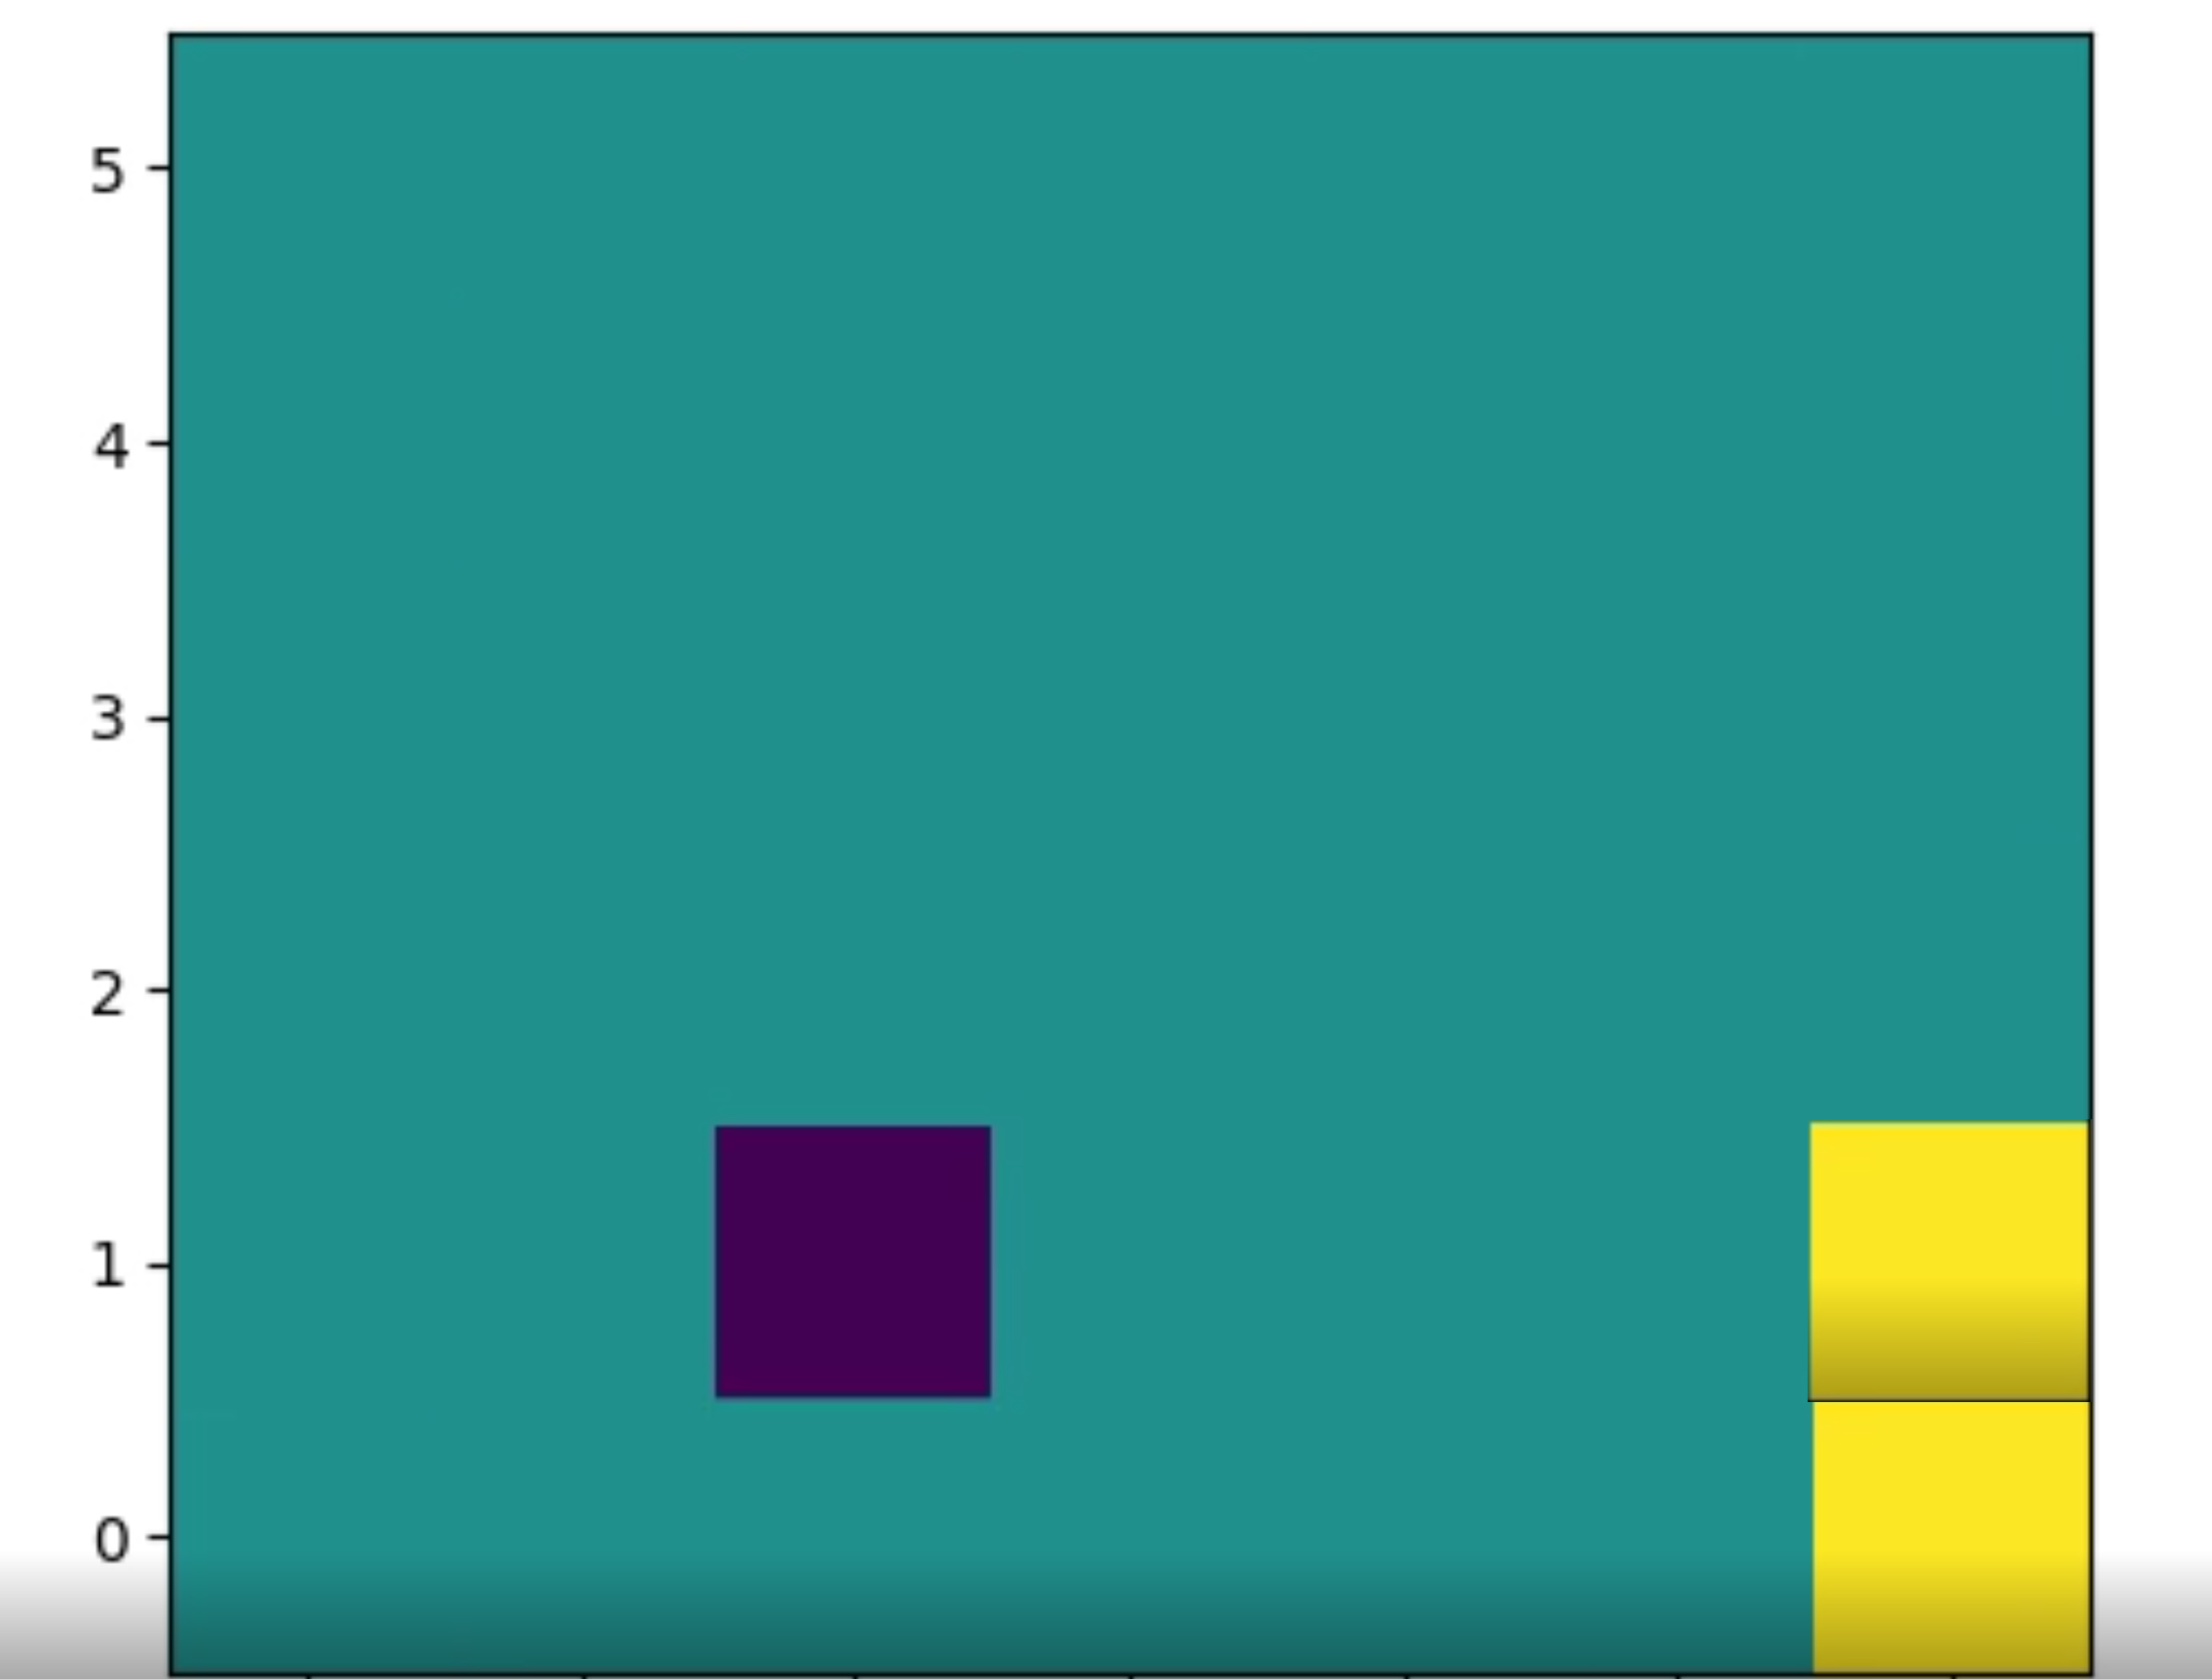

In [163]:
# Run this block to get the figure.
display.Image("./no_exit.png")

The purple square is an object that will move following some rules. Two yellow squares toghther forms a paddle that a player can only move it up, down or stay in the origin place to prevent the purple square getting out of the area from the right. You can regard these two yellow squares are sticked firmly, so you are not control these two yellow squares separately.

The specific definition of the game can be found below. Read the comments carefully, it defines the states, actions, transition probabilitys and the rewards.

In [ ]:
class No_Exit(MDP):
    # Like breakout or pong, but one player, no walls to break out, no
    # way to win. You can move paddle vertically up or down or stay
    # +1: vertically up
    # 0 : stay
    # -1: vertically down
    actions = (+1, 0, -1) 
    
    def __init__(self, field_size, ball_speed = 1, random_start = True):
        # image space is n by n
        self.q = None
        self.n = field_size
        h = self.n * ball_speed 
        self.discount_factor = (h - 1.0) / h
        self.ball_speed = ball_speed
        # state space is: ball position and velocity, paddle position
        # and velocity
        # - ball position is n by n
        # - ball velocity is one of (-1, -1), (-1, 1), (0, -1), (0, 1),
        #                          (1, -1), (1, 1)
        # - ball velocity can be defined as (row velocity, col velocity)
        # - paddle position is n; this is location of bottom of paddle,
        #    can stick "up" out of the screen
        #   the length of the paddle is 2 as showed in the figure above
        # - paddle velocity is one of 1, 0, -1
        self.states = [((br, bc), (brv, bcv), pp, pv) for \
                         br in range(self.n) for 
                         bc in range(self.n) for
                         brv in (-1, 0, 1) for
                         bcv in (-1, 1) for 
                         pp in range(self.n) for 
                         pv in (-1, 0, 1)]
        # the ball runs out of the field
        self.states.append('over')
        #self.start = dist.uniform_dist([((br, 0), (0, 1), 0, 0) \
        #                                for br in range(self.n)]) \
        #        if random_start else  \
        #        dist.delta_dist(((int(self.n/2), 0), (0, 1), 0, 0))
        init_states = [((br, 0), (0, 1), 0, 0) for br in range(self.n)]
        self.init_state = {x : 1.0 / float(len(init_states)) for x in init_states}

    ax = None
    ims = None
    
    IS_COLAB = False
    grid = None

    def draw_state(self, state = None, pause = False):
        def _update(self, state, pause):
            if self.ax is None or self.IS_COLAB:
                plt.ion()
                plt.figure(facecolor="white")
                self.ax = plt.subplot()

            if state is None: state = self.state
            ((br, bc), (brv, bcv), pp, pv) = state
            im = np.zeros((self.n, self.n+1))
            im[br, bc] = -1
            im[pp, self.n] = 1
            self.ax.cla()
            self.ims = self.ax.imshow(im, interpolation = 'none',
                                    cmap = 'viridis', 
                                    extent = [-0.5, self.n+0.5,
                                                -0.5, self.n-0.5],
                                    animated = True)
            self.ims.set_clim(-1, 1)
            plt.pause(0.0001) 
            if pause: input('go?')
            else: plt.pause(0.1 if self.IS_COLAB else 0.01) 

        if self.IS_COLAB:
            with self.grid.output_to(0, (self.parity % 10)):
                # _update(self, state, pause)
                self.grid.clear_cell(0, (self.parity + 1) % 10)
                self.parity =  (self.parity + 9) % 10
        else:
            _update(self, state, pause)

    def terminal(self, state):
        return state == 'over'

    def reward_fn(self, s, a, sp):
        return 0 if s == 'over' else 1
        
    def transition_model(self, s, a, p=0.4):
        # Only randomness is in brv and brc after a bounce
        # 1- prob of negating nominal velocity
        ret_distribution = {x : 0 for x in self.states}
        if s == 'over':
            ret_distribution[s] = 1.0
            return ret_distribution
        # Current state
        ((br, bc), (brv, bcv), pp, pv) = s
        # Nominal next ball state
        new_br = br + self.ball_speed*brv; new_brv = brv
        new_bc = bc + self.ball_speed*bcv; new_bcv = bcv
        # nominal paddle state, a is action (-1, 0, 1)
        new_pp = max(0, min(self.n-1, pp + a))
        new_pv = a
        new_s = None
        # ball hit top or bot? ball hit left or the paddle (right)?
        hit_r = hit_c = False
        # bottom, top contacts
        if new_br < 0:
            new_br = 0; new_brv = 1; hit_r = True
        elif new_br >= self.n:
            new_br = self.n - 1; new_brv = -1; hit_r = True
        # back, front contacts
        if new_bc < 0:                  # back bounce
            new_bc = 0; new_bcv = 1; hit_c = True
        elif new_bc >= self.n:
            if self.paddle_hit(pp, new_pp, br, bc, new_br, new_bc):
                new_bc = self.n - 1; new_bcv = -1; hit_c = True
            else:
                ret_distribution['over'] = 1
                return ret_distribution
                #return dist.delta_dist('over')

        new_s = ((new_br, new_bc), (new_brv, new_bcv), new_pp, new_pv)
        if ((not hit_c) and (not hit_r)):
            ret_distribution[new_s] = 1.0
            return ret_distribution
            #return dist.delta_dist(new_s)
        elif hit_c:                     # also hit_c and hit_r
            if abs(new_brv) > 0:
                #return dist.DDist({new_s: p, ((new_br, new_bc), (-new_brv, new_bcv), new_pp, new_pv) : 1-p})
                ret_distribution[new_s] = p
                ret_distribution[((new_br, new_bc), (-new_brv, new_bcv), new_pp, new_pv)] = 1 - p
                return ret_distribution
            else:
                ret_distribution[new_s] = p
                ret_distribution[((new_br, new_bc), (-1, new_bcv), new_pp, new_pv)] = 0.5 * (1 - p)
                ret_distribution[((new_br, new_bc), ( 1, new_bcv), new_pp, new_pv)] = 0.5 * (1 - p)
                return ret_distribution
        elif hit_r:
            ret_distribution[new_s] = p
            ret_distribution[((new_br, new_bc), (new_brv, -new_bcv), new_pp, new_pv)] = 1 - p
            return ret_distribution

    def paddle_hit(self, pp, new_pp, br, bc, new_br, new_bc):
        # Being generous to paddle, any overlap in row
        # We allow the paddle to save the ball at the very last step
        prset = set(range(pp, pp+2)).union(set(range(new_pp, new_pp+2)))
        brset = set([br, br+1, new_br, new_br+1])
        return len(prset.intersection(brset)) >= 2


## Task 4.1 Play No_Exit game with Policy Iteration (10 pts)
Now we are going to use policy iteration to learn to play this No_Exit game.

In [ ]:
no_exit_mdp = No_Exit(field_size=3)
st_time = time.time()
no_exit_pi = policy_iteration(no_exit_mdp, mode="one_step")
print ("one step policy iteration time cost: ", time.time() - st_time)

In [ ]:
# Simulate an episode (sequence of transitions) of at most
# episode_length, using policy function to select actions.  If we find
# a terminal state, end the episode.  Return accumulated reward a list
# of (s, a, r, s') where s' is None for transition from terminal state.
# Also return an animation if draw=True.
def sim_episode(mdp, episode_length, policy, draw=False):
    episode = []
    reward = 0
    s = sample(mdp.init_state)
    all_states = [s]
    episode_length = int(episode_length)
    for i in range(episode_length):
        a = policy[s]
        (r, s_prime) = mdp.sim_transition(s, a)
        reward += r
        if mdp.terminal(s):
            episode.append((s, a, r, None))
            break
        episode.append((s, a, r, s_prime))
        if draw: 
            mdp.draw_state(s)
        s = s_prime
        all_states.append(s)
    return reward, episode
    #animation = animate(all_states, mdp.n, episode_length) if draw else None
    #return reward, episode, animation

We test your policy in the following ways:
1. Set a num_episodes variable, and we let the ball move this many steps
2. At each step, if the ball has not escaped, you get 1 reward
3. if the ball escaped, you get 0 reward and the game ends immediately

So if your policy totally learned how to play this game, you can achieve num_episodes reward for each run.

We recommend you to start debug and tune parameters in a small field size (like 3), then start trying to deal with the big filed (like 6).

We will finally test your algorithm in a field size 3 to 4 and episode_length from 50 to 100.

In [ ]:
def test_solve_play(field_size=3, num_episodes=50, episode_length=50, mode="one_step"):
    game_mdp = No_Exit(field_size)
    no_exit_pi = policy_iteration(game_mdp, mode=mode)
    rewards = []
    for i in range(num_episodes):
        reward, _ = sim_episode(game_mdp, episode_length, no_exit_pi)
        rewards.append(reward)
    print ("Mean reward: %f +- %f" % (np.mean(rewards), np.std(rewards)))

In [ ]:
# Around 6mins
st_time = time.time()
test_solve_play(3, mode="exact")
print ("exact policy iteration time cost: ", time.time() - st_time)

In [ ]:
# Around 3mins
st_time = time.time()
test_solve_play(3, mode="one_step")
print ("one_step policy iteration time cost: ", time.time() - st_time)

We firstly test your policy iteration on a small 3*3 area. We can find that one_step policy iteration learns much faster. 

The basic reason is that at the early stage, the policy is far from the optimal one, so either exact or iterative will waste too much time on 
evaluate a very bad policy.

## Task 4.2 Learn to play the game without known the transition probability and reward function (10 pts)

There are many situations where you do not know everything about the MDP. You do not know how the state transists, you do not know how the reward is assigned. But, you have a environment that you can interact with. 

Now you will be implementing Q-learning to learn to play the No_Exit game without accessing to the transition model and reward function. What you can do is to use **sim_transition** function to interact with the environment.

To explore different actions for a specific state s, you can use either the method introduced in class or another popular one: **epsilon-greedy** which works as following:

$a = \begin{cases}
  \text{argmax}_{a} Q(s, a) & p > \epsilon \ \text{where} \ p \ \text{is a random real} \in [0, 1) \\
  \text{random} \ a \in \mathcal{A} & \text{otherwise}
\end{cases}$

The **epsilon-greedy** method does not require the algorithm to explore each action enough times for a specific state s. When the state-action space is really huge, but your interaction time is limited, this method can help Q-learning learn a better policy.

Another key factor for makeing the Q-learning work is the choice of the $\alpha$, $N_e$ and $\epsilon$. It should be a function of $N(s, a)$, potentially the total number of learning iterations of the Q-learning and any other related variables.

In [ ]:
def Q_learning(mdp, max_episodes):
    # TODO: Assignment
    # max_episodes: the total steps you have interacted with the environment
    #               
    # max_step: the max step you can do in one episode, it is used to prevent
    #           that you do infinite loop in one episode since if you learn well
    #           the ball can never exit
    assert False, "Part of the Assignment"


We will evaluate your Q-learning as similar as what we did for the policy iteration. 

We will test it with several different settings, for each setting, you are supposed to achieve around average **episode_length** reward.

The given max_iteration is very generous--actually you do not need to interact that many times.

In [ ]:
def test_learn_play(field_size=3, num_episodes=50, episode_length=50, max_episodes=100000):
    game_mdp = No_Exit(field_size)
    no_exit_pi = Q_learning(game_mdp, max_episodes)
    rewards = []
    for i in range(num_episodes):
        reward, _ = sim_episode(game_mdp, episode_length, no_exit_pi)
        rewards.append(reward)
    print ("Mean reward: %f +- %f" % (np.mean(rewards), np.std(rewards)))

In [ ]:
# Around 2mins
st_time = time.time()
test_learn_play(field_size=3, max_episodes=500000)
print ("total time for the Q-learning: ", time.time() - st_time)

In [ ]:
# Around 6mins
st_time = time.time()
test_learn_play(field_size=4, max_episodes=1000000)
print ("total time for the Q-learning: ", time.time() - st_time)

We can observe that even only for a very small field (5 * 5), the policy iteration cannot solve it in a reasonable time. 

The Q-learning can learn to play it a little bit (cannot learn an optimal policy) with a reasonable time.


Below is only **For Your Interest**, you can use the method introduced below in your previous implementation to improve its efficiency.

To improve the efficiency of the Q-learning, one effective way is to address its overestimation. 

The overestimation issue will increase the variance of the estimated expected cumulative reward. So we want to reduce these variance.

There are two popular methods:

1. Experience Replay Buffer
2. Double Q-learning

Their basic ideas are straightforward and you can check them out if you are interested.